## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as linregress
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [2]:
#view mouse_metada
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#view study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset using Mouse ID
mice_study = mouse_metadata.merge(study_results, how='left', on=['Mouse ID'])
# Display the data table for preview
mice_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_number = mice_study['Mouse ID'].nunique()
mice_number

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mice_study[mice_study.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = mice_study.loc[mice_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_data

array(['g989'], dtype=object)

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = mice_study[mice_study['Mouse ID'].isin(duplicate_mouse_data)==False]
clean_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = clean_mice_data['Mouse ID'].nunique()
clean_mice_number

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen_stats = clean_mice_data.groupby("Drug Regimen")

#stats table
mean = drug_regimen_stats['Tumor Volume (mm3)'].mean()
median = drug_regimen_stats['Tumor Volume (mm3)'].median()
variance = drug_regimen_stats['Tumor Volume (mm3)'].var()
standard_dv =drug_regimen_stats['Tumor Volume (mm3)'].std()
sem =drug_regimen_stats['Tumor Volume (mm3)'].sem()

drug_regimen_summary_table = pd.DataFrame({"Mean": mean,"Median":median,"Variance": variance,"Standard Deviation":standard_dv,"SEM":sem})
drug_regimen_summary_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats = clean_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

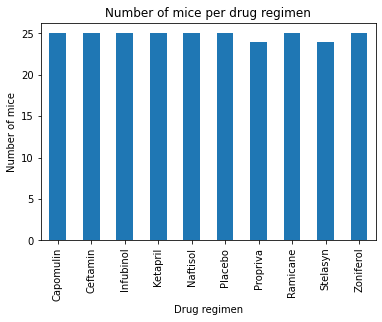

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_data = clean_mice_data.groupby(["Drug Regimen"])["Mouse ID"].nunique()
drug_chart = drug_data.plot(kind='bar', title="Number of mice per drug regimen")

#labels
drug_chart.set_xlabel("Drug regimen")
drug_chart.set_ylabel("Number of mice")
plt.show()
plt.tight_layout()


<BarContainer object of 10 artists>

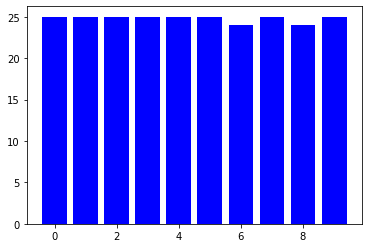

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_data = clean_mice_data.groupby(["Drug Regimen"])["Mouse ID"].nunique()
x_axis = np.arange(0, len(mice_data))

 # Create a bar chart based upon the above data
plt.bar(x_axis, mice_data, color="b", align="center")

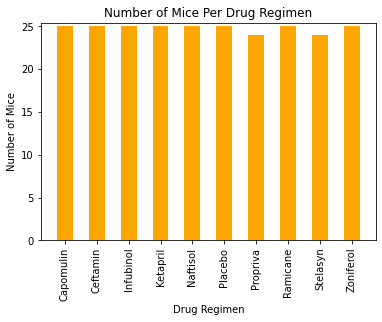

In [14]:
 # Create the ticks for our bar chart's x axis
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

 # Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

 # Set the limits of the y axis
plt.ylim(0, max(mice_data)+0.4)

 # Labelling
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#Plotting
plt.bar(mice_data.index, mice_data, facecolor="orange",align="center",width=0.5)
plt.xticks(tick_locations, mice_data.index,rotation="vertical")
plt.show()

In [15]:
# Calculate the mice gender counts
mice_gender = clean_mice_data[["Mouse ID", "Sex"]].drop_duplicates()
mice_sex = mice_gender["Sex"].value_counts()
mice_sex

Male      125
Female    123
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x2b37151aa90>,
 [Text(-0.8592086690173829, 0.8377114438071008, 'Male'),
  Text(0.7876079465992676, -0.767902156823176, 'Female')],
 [Text(-0.5012050569268066, 0.4886650088874755, '50.4%'),
  Text(0.42960433450869134, -0.41885572190355047, '49.6%')])

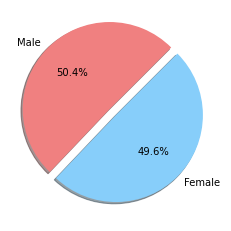

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

labels=["Male", "Female"]
sizes=[125, 123]
colors = ["lightcoral", "lightskyblue"]
explode=(0.1,0)


pie_plot = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
pie_plot


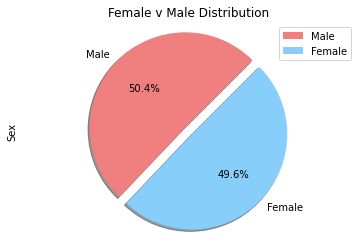

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex, labels=mice_sex.index,colors=colors,autopct="%1.1f%%", shadow=True, startangle=45, explode=explode)
plt.axis("equal")
plt.title("Female v Male Distribution")
plt.ylabel("Sex")
plt.legend(loc= "upper right")
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint.head()



Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tum_vol_df = pd.merge(clean_mice_data, last_timepoint, how="inner", on=["Mouse ID", "Timepoint"])
tum_vol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Locate the rows which contain mice on each drug and get the tumor volumes

drug_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

#create and set counter
counter=0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_treatment:
    volume_df = tum_vol_df.loc[tum_vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

      
# Determine outliers using upper and lower bounds
    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
    outliers
  
    
    
    # printing the results 
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lower_bound}")
    print(f"The upper quartile of {drug} is: {upper_bound}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1
    



--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 20.70456164999999
The upper quartile of Capomulin is: 51.83201549
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 17.912664470000003
The upper quartile of Ramicane is: 54.30681135
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 36.83290494999999
The upper quartile of Infubinol is: 82.74144559000001
Th

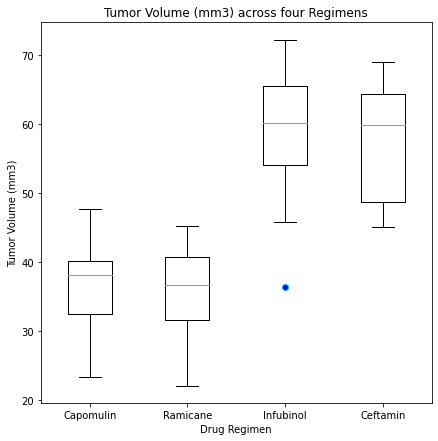

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_dot = dict(markerfacecolor="b",marker="o", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol, flierprops=blue_dot)

#Labelling
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(drug_treatment) + 1),ticklabels=drug_treatment)

plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#find random mouse treated with Capomulin
cap_mouse = (clean_mice_data[clean_mice_data["Drug Regimen"]=="Capomulin"]).sample()
cap_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
215,w914,Capomulin,Male,24,21,0,45.0,0


In [23]:
#Generate data points for random mouse chosen above

mouse_data = clean_mice_data.loc[clean_mice_data['Mouse ID'] == 's710']
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
361,s710,Capomulin,Female,1,23,0,45.000000,0
362,s710,Capomulin,Female,1,23,5,43.180977,0
363,s710,Capomulin,Female,1,23,10,43.688026,0
364,s710,Capomulin,Female,1,23,15,41.845235,0
365,s710,Capomulin,Female,1,23,20,42.629963,1
366,s710,Capomulin,Female,1,23,25,43.060409,1
367,s710,Capomulin,Female,1,23,30,43.571703,1
368,s710,Capomulin,Female,1,23,35,44.160519,1
369,s710,Capomulin,Female,1,23,40,40.171920,1
370,s710,Capomulin,Female,1,23,45,40.728578,1


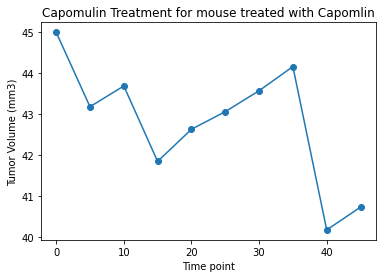

In [24]:
# Generate a scatter plot of the mouse chosen above

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for mouse treated with Capomlin")

# Display plot
plt.show()

In [25]:


# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Generate data for mouse weight on capomulin regimen
mouse_weight_cap = clean_mice_data.loc[clean_mice_data["Drug Regimen"] == "Capomulin"]
mouse_weight_cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [26]:
# Find average tumor volume for each mouse
avg_tum_vol = pd.DataFrame(mouse_weight_cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg tumor volume'})
avg_tum_vol.head()

,Mouse ID,Avg tumor volume
0,s185,34.559143
1,m601,34.847470
2,x401,36.182040
3,f966,36.505973
4,r554,36.509212


In [27]:
# Merge average tumor volume onto data_df and drop duplicates
avg_tum_vol = pd.merge(mouse_weight_cap, avg_tum_vol, on='Mouse ID')
merged_tum_vol = avg_tum_vol[['Weight (g)', 'Avg tumor volume']].drop_duplicates()
merged_tum_vol.head()

,Weight (g),Avg tumor volume
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495


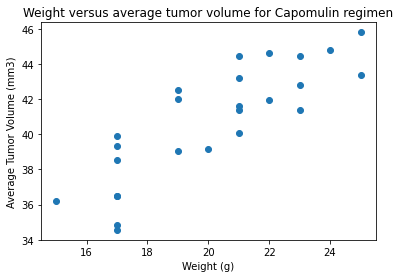

In [28]:
#Create data points and generate scatter plots
x = merged_tum_vol['Weight (g)']
y = merged_tum_vol['Avg tumor volume']


plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Weight versus average tumor volume for Capomulin regimen')
# Display plot
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")


The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


In [30]:
# Perform a linear regression 
weight = merged_tum_vol.iloc[:,0]
avg_tumor_volume = merged_tum_vol.iloc[:,1]
cap_slope, cap_int, cap_r, cap_p, cap_std_err = stats.linregress(weight, avg_tumor_volume)

In [31]:
 # Create equation of line 
regress_values = cap_slope * weight + cap_int
line_eq = "y = " + str(round(cap_slope,2)) + "x + " + str(round(cap_int,2))

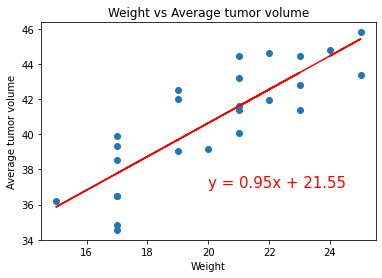

In [32]:
#Generate plot
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

#labelling
plt.title('Weight vs Average tumor volume')
plt.xlabel('Weight')
plt.ylabel('Average tumor volume')
plt.show()